# LAB - RANDOM VARIABLE DISTRIBUTIONS

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [61]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [63]:
# Standardizing header names
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = cols

## 1. Get the numerical variables from our dataset.

In [66]:
# Splitting numerical values from categorical values.
numerical = data.select_dtypes(np.number)

## 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

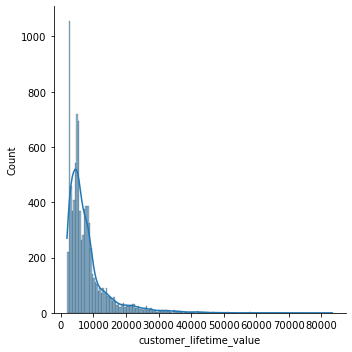

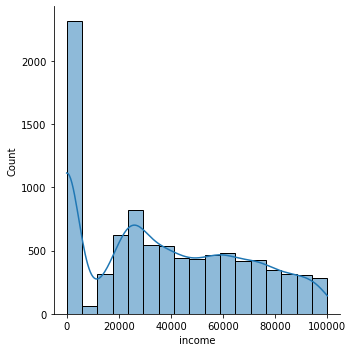

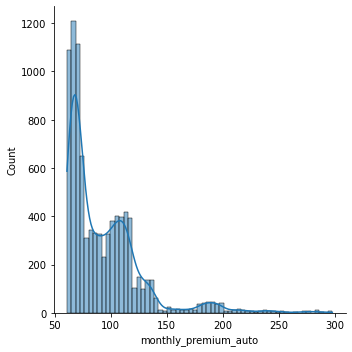

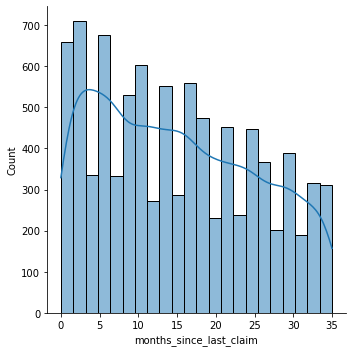

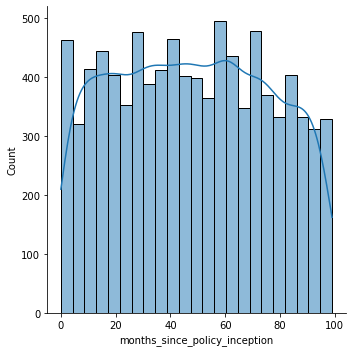

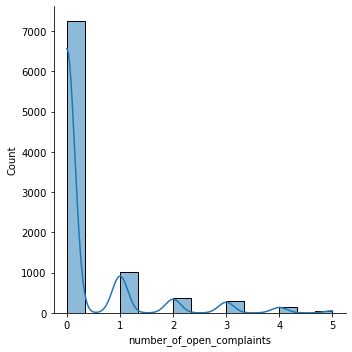

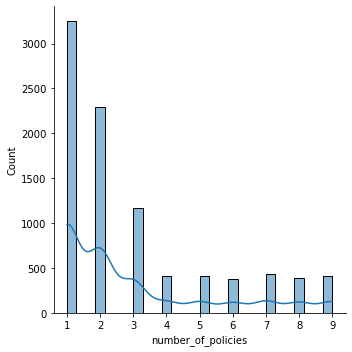

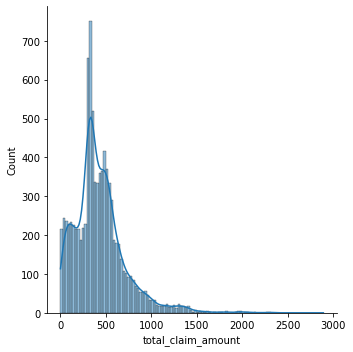

In [65]:
for col in numerical.columns:
    sns.displot(numerical[col], kde = True)
    plt.show() # Doesn't necessarily need indentation.

## 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [39]:
# Using MinMaxScaler
transformer = MinMaxScaler().fit(numerical)
num_norm = transformer.transform(numerical)
print(num_norm.shape)
num_norm = pd.DataFrame(num_norm, columns=numerical.columns)

(9134, 8)


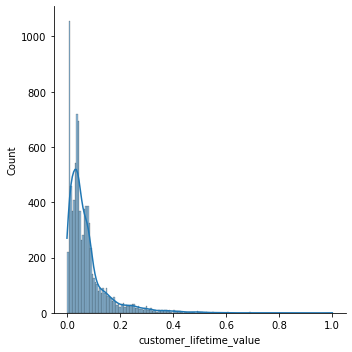

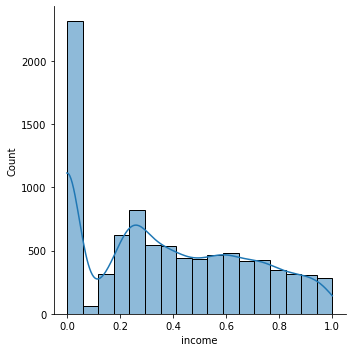

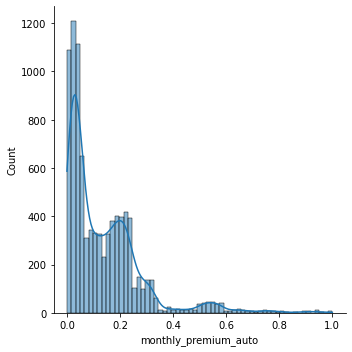

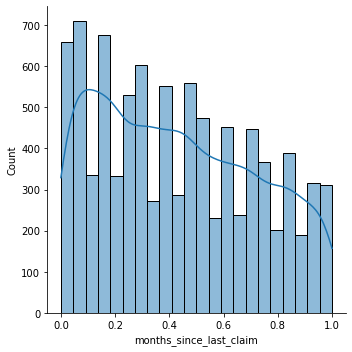

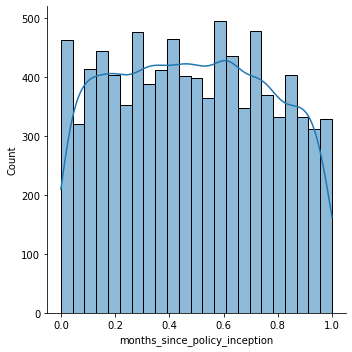

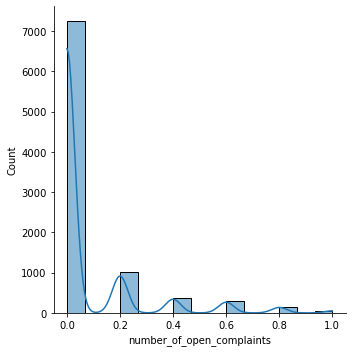

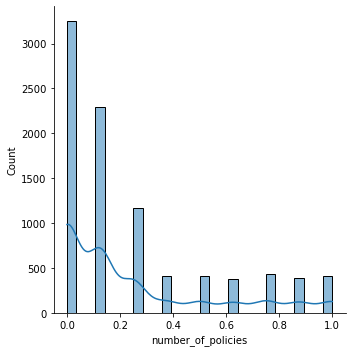

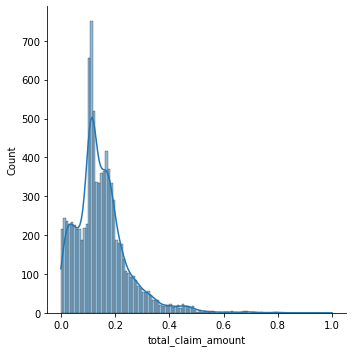

In [40]:
for col in num_norm.columns:
    sns.displot(num_norm[col], kde = True)
    plt.show()

In [41]:
# Using StandardScaler
transformer = StandardScaler().fit(numerical)
num_stand = transformer.transform(numerical)
print(num_stand.shape)
num_stand = pd.DataFrame(num_stand, columns=numerical.columns)

(9134, 8)


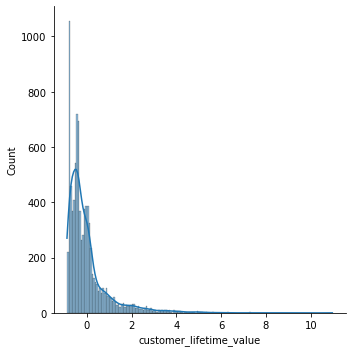

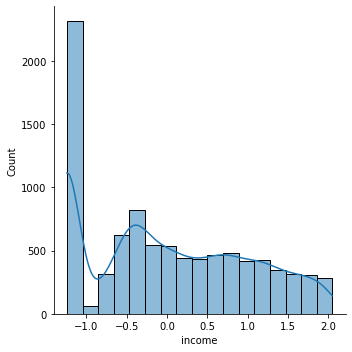

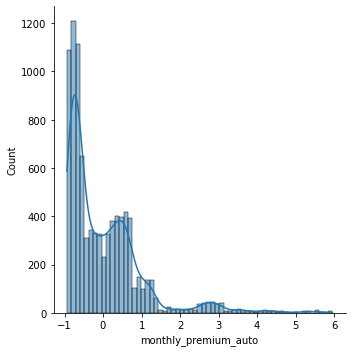

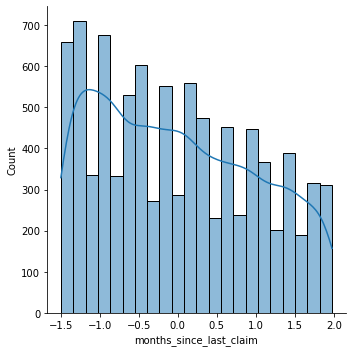

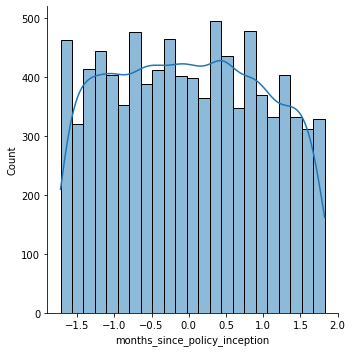

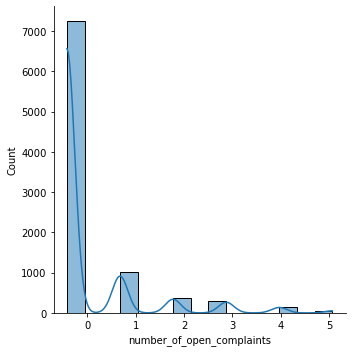

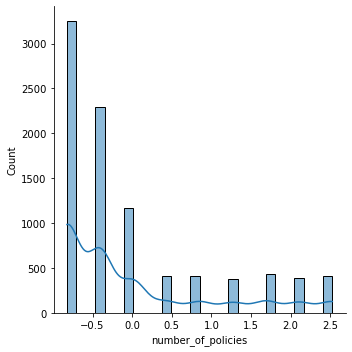

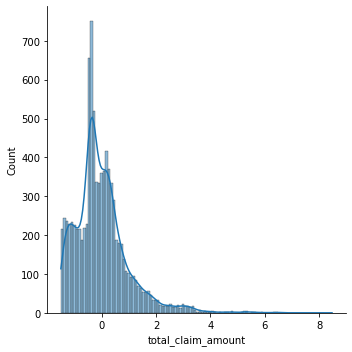

In [43]:
for col in num_stand.columns:
    sns.displot(num_stand[col], kde = True)
    plt.show()

In [57]:
# Using log10
# I have tried to put this into a function but couldn't.
def log_transform_clean1(x):
    x = np.log10(x)
    if np.isfinite(x):
        return x
    else:
        return 0

log_transform = numerical['total_claim_amount'].apply(log_transform_clean1)


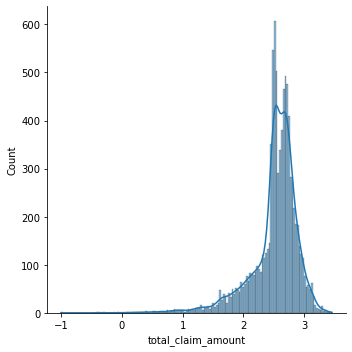

In [58]:
sns.displot(log_transform, kde = True)
plt.show()

Comment: neither MinMaxScaler nor Standard scaler are changing the shape of the plots. 
However, there seems to be a more normalized distribution when we use a log10 tansformation. 